
<div style="background-color:#f0f0f0; padding:10px; border-radius:5px;">
    <h2 style="color:#333333; text-align:center;">Background</h2>
    <p style="color:#555555; font-size:16px;">
        Invistico Airlines, a key player in the aviation industry, is dedicated to <strong>enhancing customer satisfaction</strong>. The challenge lies in accurately predicting customer satisfaction from historical flight data. It's crucial to understand the <strong>key drivers of customer satisfaction</strong> to tailor services effectively, which will foster positive experiences and increase loyalty among passengers. As a data analyst consultant, the task is to use <strong>Decision Trees</strong> for preliminary analysis to identify the most important features affecting customer satisfaction. This effort complements the Senior Analyst team's aim of building a robust model that captures the intricacies in the data.
    </p>
</div>


<div style="background-color:#f0f0f0; padding:10px; border-radius:5px; margin-top:10px;">
    <h2 style="color:#333333; text-align:center;">Objective</h2>
    <p style="color:#555555; font-size:16px;">
        The primary objective is to <strong>identify the most impactful features</strong> contributing to customer satisfaction using Decision Trees, aiding the airline in tailoring their services more effectively.
    </p>
</div>

<div style="background-color:#f0f0f0; padding:10px; border-radius:5px; margin-top:10px;">
    <h2 style="color:#333333; text-align:center;">Goals</h2>
    <ul style="color:#555555; font-size:16px;">
        <li>Identify the most important features contributing to customer satisfaction as determined by the model's analysis.</li>
        <li>Evaluate the performance of the model using metrics such as <strong>accuracy, precision, recall</strong>, and <strong>F1-score</strong>.</li>
    </ul>
</div>


## Technical Report on Predictive Analysis for Customer Satisfaction at Invistico Airlines

### Introduction

Invistico Airlines has embarked on a data-driven initiative to enhance customer satisfaction through predictive analytics. By leveraging decision tree models, our aim is to identify and prioritize the key features that influence customer satisfaction based on historical flight data. This report outlines the methodology, key findings, and strategic recommendations derived from the model's analysis.

### Objectives

The objectives of this analysis were:

1. To identify the most significant features contributing to customer satisfaction using a decision tree model.
2. To evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1-score.

### Methodology

#### Data Preparation and Model Construction

We utilized historical customer data, which included various attributes of flight experiences. The data underwent preprocessing to ensure quality and relevance. A decision tree model was then trained to classify customer satisfaction, focusing on interpretability to ensure actionable insights.

#### Model Evaluation

The model's performance was assessed on several fronts:

- **Accuracy**: The overall correctness of the model in classifying satisfaction, which was found to be over 94%.
- **Precision and Recall**: These metrics helped in understanding the model's ability to minimize false positives and false negatives, crucial for resource allocation and customer retention strategies.
- **F1-Score**: Balanced metric that considers both precision and recall, providing a more complete picture of the model's performance.

### Observations

Key observations from the model's analysis included:

- The decision tree effectively identified the majority of customer satisfaction statuses correctly, with significant counts of both satisfied (13K+) and unsatisfied (16K+) customers.
- The importance of minimizing false negatives (1204 instances) was noted, as misclassifying satisfied customers as unsatisfied could lead to unnecessary resource allocation.
- High precision indicates the model's efficiency in minimizing instances where dissatisfied customers are incorrectly classified as satisfied, which is vital to prevent potential customer churn.

### Key Findings

The decision tree model highlighted several features as being particularly influential in predicting customer satisfaction:

- **Inflight Entertainment**
- **Seat Comfort**
- **Ease of Online Booking**

These features were consistently identified as the top predictors of satisfaction, underscoring their importance in the overall customer experience.

### Future Steps

Given the findings, the following steps are recommended for Invistico Airlines:

- **Enhance Key Service Areas**: Focus on improving inflight entertainment, seat comfort, and the ease of online booking, as these areas are strongly correlated with customer satisfaction.
- **Continuous Model Improvement**: Further refine the decision tree model by incorporating additional data and exploring advanced modeling techniques to improve accuracy and reduce false negatives.
- **Strategic Resource Allocation**: Utilize the insights from the model to better allocate resources towards the most impactful areas, enhancing customer satisfaction efficiently.

### Conclusion

The decision tree analysis has provided valuable insights into the drivers of customer satisfaction at Invistico Airlines. By continuing to invest in these analytical approaches and focusing on the key areas identified, the airline can significantly enhance customer satisfaction and loyalty.





# Data Dictionary:
<img src = 'airlines_data_dict.png' width = '700' height = '700' align = 'center'>

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# For metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# EDA 

In [2]:
# Reading the file
data = pd.read_csv('Invistico_Airline.csv')

data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

**Observation**:
- There are null values in `Arrival Delay in minutes`
- There are four `object` data type columns that need to be addressed with encoding or feature extraction

In [4]:
# Descriptive Stats
data.describe(include = 'all')

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71087,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,2.851994,2.990422,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,1.443729,1.305970,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


In [5]:
# Check rows and colums:
data.shape

(129880, 22)

In [6]:
# Unique values in the object columns
cols = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

for col in cols:
    print(col,':', data[col].unique())
    print('')

satisfaction : ['satisfied' 'dissatisfied']

Customer Type : ['Loyal Customer' 'disloyal Customer']

Type of Travel : ['Personal Travel' 'Business travel']

Class : ['Eco' 'Business' 'Eco Plus']



In [7]:
# Unique values in the object columns
cols = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

for col in cols:
    print(col,':\n',data[col].value_counts(normalize = True)*100)
    print('')

satisfaction :
 satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

Customer Type :
 Loyal Customer       81.690791
disloyal Customer    18.309209
Name: Customer Type, dtype: float64

Type of Travel :
 Business travel    69.058362
Personal Travel    30.941638
Name: Type of Travel, dtype: float64

Class :
 Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: Class, dtype: float64



**Observations**: We are only concerened with the *'satisfaction'* feature
- The target feature, `satisfaction` has 54% cusomters labeled as satisfied and 45% labeled as dissatisfied

In [8]:
# Check for nulls:
# Dataframe for Nulls and their percentage in column 
nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns = ['perecntage_nulls'])
nulls['total_nulls'] = data.isnull().sum()
nulls

,perecntage_nulls,total_nulls
satisfaction,0.000000,0
Customer Type,0.000000,0
Age,0.000000,0
Type of Travel,0.000000,0
Class,0.000000,0
Flight Distance,0.000000,0
Seat comfort,0.000000,0
Departure/Arrival time convenient,0.000000,0
Food and drink,0.000000,0
Gate location,0.000000,0


**Observation**:
- Since we have `0.3%` null values, we will simply drop them as the population size is over 100K.
- Since the number of nulls are negligible, this wont have any effect on our target feature distribution.

In [9]:
# Drop the nulls
df_subset = data.dropna(axis=0).reset_index(drop = True)

In [10]:
# Varifying dropped nulls
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

**Note:**
> Decision trees are generally robust to outliers, meaning they can handle data with outliers without significant degradation in performance. Decision trees make splits in the data based on thresholds for features, and outliers may simply result in additional splits rather than negatively impacting the overall performance of the tree.
- Hence we will proceed with encoding our categorical variables.
- We will map the `Class` and `Satisfaction` features to manual numeric values
- We will use `get dummies()` methodology to encode the rest of our categorical features.

## Encoding categorical features:

In [12]:
# Encoding 'class' feature
df_subset['Class'] = df_subset['Class'].map({'Business': 3, "Eco Plus": 2, "Eco": 1 })

# Encoding satisfaction feature:
df_subset['satisfaction'] = df_subset['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})


In [13]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

In [14]:
# Encoding the rest of our features:
df_subset = pd.get_dummies(df_subset, drop_first=True)

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Age                                129487 non-null  int64  
 2   Class                              129487 non-null  int64  
 3   Flight Distance                    129487 non-null  int64  
 4   Seat comfort                       129487 non-null  int64  
 5   Departure/Arrival time convenient  129487 non-null  int64  
 6   Food and drink                     129487 non-null  int64  
 7   Gate location                      129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Inflight entertainment             129487 non-null  int64  
 10  Online support                     129487 non-null  int64  
 11  Ease of Online booking             1294

**Obseravtions**:
- We have all our features in the appropiate format to proceed with deploying our Decision Tree for learning.

## Building a Baseline Decision Tree:

In [15]:
%%time
# Data split
y = df_subset['satisfaction']
X = df_subset.copy()

X = X.drop('satisfaction', axis = 1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialise the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree.fit(X_train, y_train)

CPU times: user 459 ms, sys: 11.5 ms, total: 471 ms
Wall time: 478 ms


DecisionTreeClassifier(random_state=42)

In [16]:
# Make prediction on X_test
y_pred_baseline = decision_tree.predict(X_test)

In [17]:
# Evaluation Metrics

print("Decision Tree")
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred_baseline))
print("Precision:", "%.6f" % precision_score(y_test, y_pred_baseline))
print("Recall:", "%.6f" % recall_score(y_test, y_pred_baseline))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred_baseline))

Decision Tree
Accuracy: 0.935160
Precision: 0.941928
Recall: 0.939538
F1 Score: 0.940731


In [18]:
# Create a table with these metrics
model_name = 'Baseline Decision Tree'
accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline)
recall = recall_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline)

metrics_df = pd.DataFrame({
    'Model': [model_name],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline Decision Tree,0.93516,0.941928,0.939538,0.940731


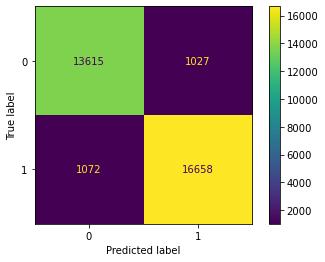

In [19]:
cm = confusion_matrix(y_test, y_pred_baseline, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=decision_tree.classes_)
disp.plot()

**Observations:**
- In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively).
- The matrix also had a relatively low number of false positives and false negatives (where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.)

[Text(0.5, 0.875, 'Inflight entertainment <= 3.5\ngini = 0.496\nsamples = 97115\nvalue = [43963, 53152]\nclass = satisfied'),
 Text(0.25, 0.625, 'Seat comfort <= 3.5\ngini = 0.339\nsamples = 43502\nvalue = [34098, 9404]\nclass = dissatisfied'),
 Text(0.125, 0.375, 'Seat comfort <= 0.5\ngini = 0.247\nsamples = 38022\nvalue = [32531, 5491]\nclass = dissatisfied'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Seat comfort <= 4.5\ngini = 0.408\nsamples = 5480\nvalue = [1567, 3913]\nclass = satisfied'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Ease of Online booking <= 3.5\ngini = 0.3\nsamples = 53613\nvalue = [9865, 43748]\nclass = satisfied'),
 Text(0.625, 0.375, 'Inflight entertainment <= 4.5\ngini = 0.485\nsamples = 14645\nvalue = [6063, 8582]\nclass = satisfied'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Customer Type_d

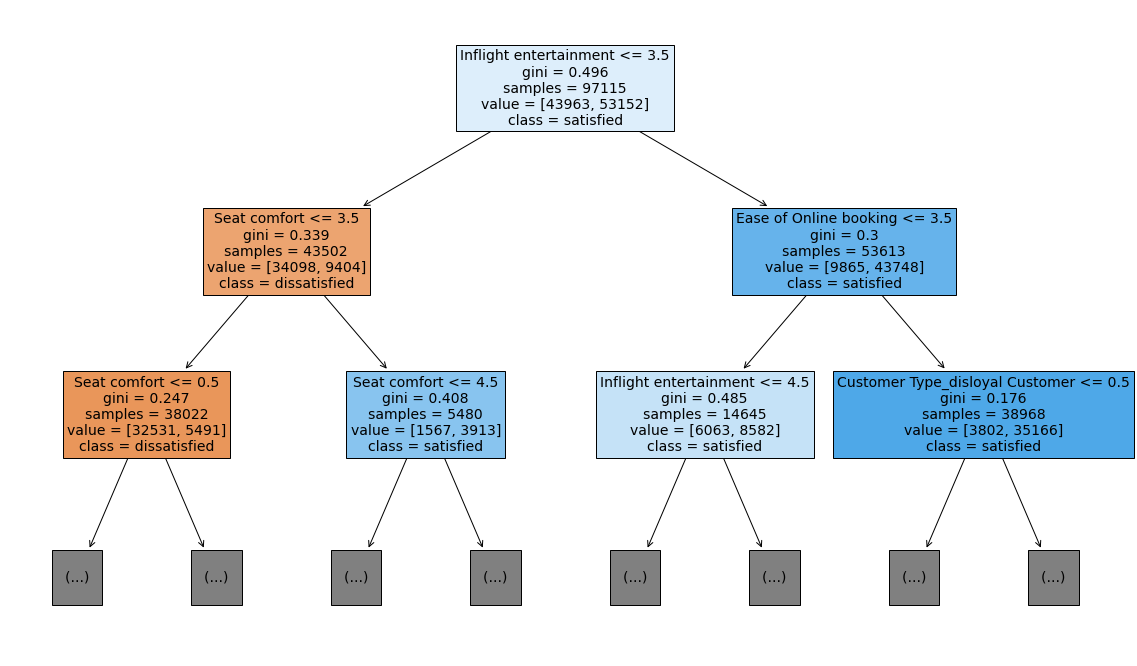

In [20]:
# Most important features:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, 
          max_depth=2, 
          fontsize=14, 
          feature_names=X.columns, 
          filled=True, 
          class_names={1: 'satisfied', 0:'dissatisfied'})

### Top Insights on Customer Satisfaction from Decision Tree Classifier

1. **Inflight Entertainment Importance**:<br>
    - The root node of the decision tree highlights the significance of inflight entertainment.
    - Customers rating inflight entertainment less than or equal to 3.5 are further categorized.

2. **Seat Comfort Significance**:<br>
    - For dissatisfied customers(rating inflight entertainment <= 3.5) `Seat Comfort` is crucial.
    - Customers rating seat comfort as 3.5 or less are further divided based on their satisfaction levels.

3. **Ease of Online Booking**:<br>
    - For satisfied customers (rating inflight entertainment > 3.5), `Ease of online booking` emerges as crucial.
    - This suggests a correlation between online booking convenience and overall satisfaction.



These insights underline the critical factors influencing customer satisfaction:
- Improving inflight entertainment.
- Enhancing online booking convenience.
- Providing comfortable seating.



### Build a feature importance graph

Uncover which features might be most important to your decision tree model by building a feature importance graph. 

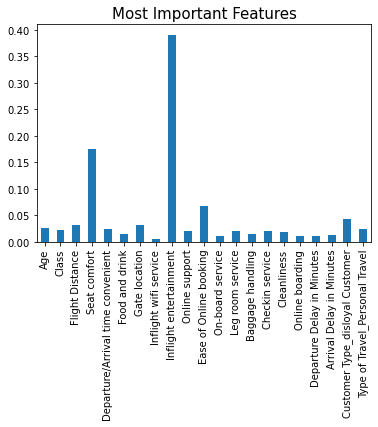

In [21]:
# Plot most important features
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)

forest_importances.plot.bar()
plt.title("Most Important Features", size = 15)
plt.show()

**Observations**:
- Inflight Entertainment, seat comfort, ease of online booking and Customer type disloyal customer appear to be the key factosrs influencing the Customer satisfaction.

**Note**:
> Decision trees can be particularly susceptible to overfitting. This is evident with our high (90+) scores for precision and recall. Combining hyperparameter tuning and grid search can help ensure this doesn't happen. 
For instance, setting an appropriate value for max depth could potentially help reduce a decision tree's overfitting problem by limiting how deep a tree can grow.



## Hyper parameter tuning:
we will find the best values for the hyperparameters max_depth and min_samples_leaf using grid search and cross validation.

In [22]:
%%time
# Instantiate the classifier
tuned_dtree = DecisionTreeClassifier(random_state=0)

# Specify the hyper paramters:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Grid search
clf = GridSearchCV(estimator=tuned_dtree, 
                   param_grid= tree_para,
                   scoring= scoring,
                   refit='f1',
                   cv = 5)


CPU times: user 5min 42s, sys: 307 ms, total: 5min 42s
Wall time: 5min 43s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'accuracy', 'precision', 'f1', 'recall'})

In [ ]:
# Fit model:
# clf.fit(X_train, y_train)

## Determine the "best" decision tree model's accuracy, precision, recall, and F1 score**

In [23]:
def make_results(model_name, model_object, table):
    """
    Accepts as arguments a model name (your choice - string), a fit GridSearchCV model object and a table

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """
    # Fetch all values from the Cross validation and create a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the Best estimator row for metric values:
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    
    # Fetch indiviudal metric scores from the isolated row:
    accuracy = best_estimator_results.mean_test_accuracy
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1
    
    # Append these values to a prexisting metrics table: 
    table = table.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index = True)
    
    return table
    

In [24]:
# Calling the function 
make_results('Tuned Decision Tree', clf, metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline Decision Tree,0.935160,0.941928,0.939538,0.940731
1,Tuned Decision Tree,0.940864,0.955197,0.935863,0.945422


**Observation**:
- The F1 score for the decision tree that was not hyperparameter tuned is 0.940731 and the F1 score for the hyperparameter-tuned decision tree is 0.945422. 
- While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model.

Moving forward identifying the most important features from this fine tuned Decision Tree:

In [25]:
# Best estimators
best_estimator = clf.best_estimator_

print(best_estimator)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, random_state=0)


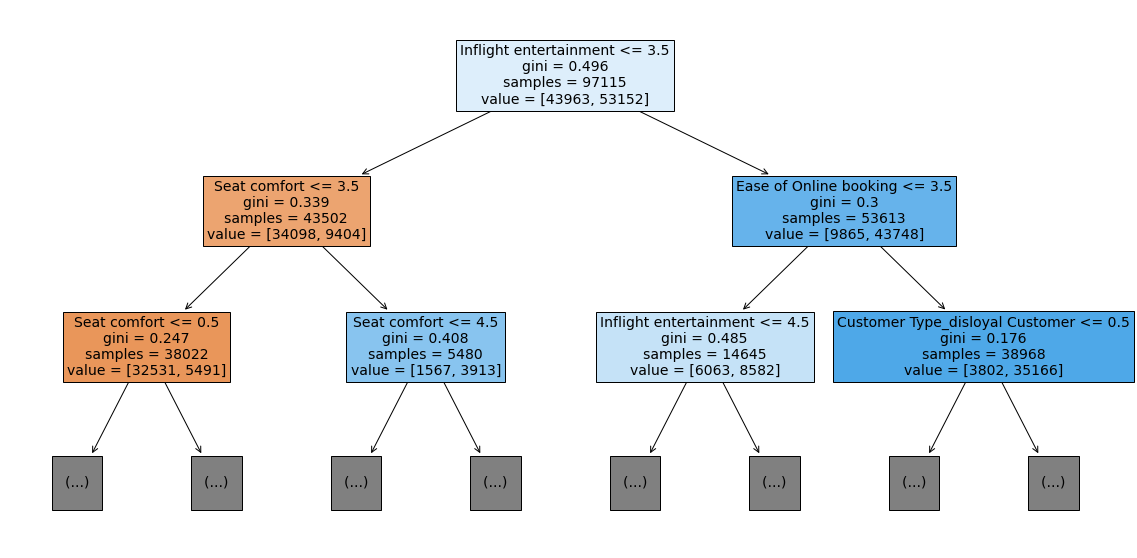

In [26]:
# Plot the decision tree:
plt.figure(figsize = (20,10))
plot_tree(best_estimator, max_depth=2, feature_names=X.columns, fontsize=14, filled=True)
plt.show()

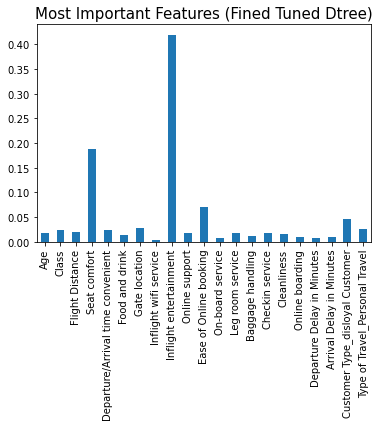

In [27]:
# Plot the most important features:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index = X.columns)

forest_importances.plot.bar()
plt.title("Most Important Features (Fined Tuned Dtree)", size = 15)
plt.show()

**Observation**:
- The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the "most important" features for this model. 

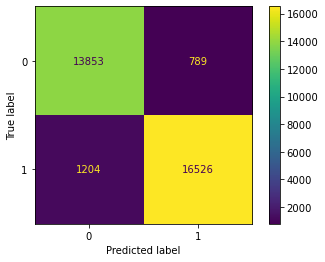

In [28]:
# Make predictions using the Tuned Model
y_pred_tuned = clf.predict(X_test)

# Confusion matrix:
cm = confusion_matrix(y_test, y_pred_tuned, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()

**Observations**:
    
- The model identified majority of the customers correctly (satisfied 13K+ and unsatisfied 16K+)
- Recall measures the percentage of actual positives a model correctly identified (true positive). In our case, the airlines should focus on minimising the False negatives (1204), cases where the customer is happy but has been identified as dissatisfied. Assuming a customer was dissatisfied would lead the airlines to deploy unnecessary resources trying to improve the customer satisfaction of an already satisfied customer.
- Precision measures the proportion of actual positives a model correctly identified as positive. For instance, if we do not want to falsely classify a customer as satisfied when indeeed the customer is dissatisfied, the precision score would be good metric. Assuming a customer is happy when they are not, might lead to customer churn.

# Stakeholder Summary:

- Decision trees accurately predicted satisfaction over 94 percent of the time.
- The confusion matrix is useful as it shows a similar number of true positives and true negatives.
- The visualization of the decision tree and the feature importance graph both suggest that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the most important features in the model.

# Future steps:

*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 